# 02 - Обзор основных алгоритмов Boosting 

In [79]:
В домашнем задании, будем обучать разные алгоритмы машинного обучения. Для этого, нужно предварительно зафиксировать схему валидации решения (можете выбрать любую, которую знаете). Выбранную схему валидации нужно использовать во всех задачах этого домашнего задания. Метрика качества - ROC AUC, целевая переменная - isFraud.

Ссылка на данные - https://drive.google.com/file/d/1gMEVl47pIoV1-AseB9doQ6DZNJrY3NkW/view?usp=sharing

Задание 1: отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

Задание 2: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

Задание 4: для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

Задание 5: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

Задание 6: обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

Задание 7: для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

Задание 8: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

Задание 9: обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

Задание 10: построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.

Задание на повторение:
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.

Задание 1: Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.
Задание 2: построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.
Задание 3: построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.
Задание 4: построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.

SyntaxError: invalid syntax (<ipython-input-79-45c7548fcc95>, line 1)

In [1]:
!pip install -U xgboost
!pip install -U lightgbm
!pip install -U catboost

  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.2.0
    Uninstalling xgboost-1.2.0:
      Successfully uninstalled xgboost-1.2.0


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Отказано в доступе: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~gboost\\lib\\xgboost.dll'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 3.0.0
    Uninstalling lightgbm-3.0.0:
      Successfully uninstalled lightgbm-3.0.0
  Attempting uninstall: catboost
    Found existing installation: catboost 0.24.2
    Uninstalling catboost-0.24.2:
      Successfully uninstalled catboost-0.24.2


In [2]:
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

#### Загрузка данных

In [4]:
DATA_TRAIN = "assignment_2_train.csv"
DATA_TEST = "assignment_2_test.csv"

In [5]:
data = pd.read_csv(DATA_TRAIN)
print("data.shape = {} rows, {} cols".format(*data.shape))
data.head(n=2)

data.shape = 180000 rows, 394 cols


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
test_data = pd.read_csv(DATA_TEST)
print("data_test.shape = {} rows, {} cols".format(*test_data.shape))
test_data.head(n=2)

data_test.shape = 100001 rows, 394 cols


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3287000,1,7415038,226.0,W,12473,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3287001,0,7415054,3072.0,W,15651,417.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Быстрый просмотр данных

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 541.1+ MB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 300.6+ MB


In [9]:
ID_F = 'TransactionID'
TARGET_F = 'isFraud'
DT_F = 'TransactionDT'
NUMERICAL_F = data.select_dtypes(include=[np.number]).columns.drop([TARGET_F, ID_F])
CAT_F = data.select_dtypes(include='object').columns

### Подготовка данных для моделей

In [13]:
target = data[TARGET_F]
train_df = data.drop([ID_F, TARGET_F], axis=1)
print("tr_df.shape = {} rows, {} cols".format(*train_df.shape))

tr_df.shape = 180000 rows, 392 cols


#### Числовые данные

In [14]:
def make_numeric_df(df: pd.DataFrame) -> pd.DataFrame:
    return df[NUMERICAL_F]

In [16]:
num_df = make_numeric_df(train_df)
num_df

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,86400,68.50,13926,NaN,150.0,142.0,315.0,87.0,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,86401,29.00,2755,404.0,150.0,102.0,325.0,87.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,86469,59.00,4663,490.0,150.0,166.0,330.0,87.0,287.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,86499,50.00,18132,567.0,150.0,117.0,476.0,87.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,86506,50.00,4497,514.0,150.0,102.0,420.0,87.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,3958217,39.00,1877,310.0,150.0,224.0,272.0,87.0,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179996,3958237,59.95,10075,514.0,150.0,224.0,315.0,87.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179997,3958241,34.00,6053,122.0,150.0,195.0,330.0,87.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179998,3958260,59.00,7726,555.0,150.0,226.0,272.0,87.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Категориальные данные

In [17]:
def make_small_cat(col: pd.Series, level: float = 0.05) -> pd.Series:
    """ Заменяет значения признака на other если в отсортированной 
        по возрастанию коммулятивной сумме значение в диапазоне [0, level]
    """
    try:
        vc_p =col.value_counts(normalize=True,ascending=True)
        p_other_cat = vc_p[vc_p.cumsum() <= 0.05].index.to_list()
        return col.apply(lambda x: 'other' if x in p_other_cat else x)
    except Exception as err:
        print(f'Ошибка при обработке {col.name}')
        raise err

In [18]:
def make_category_df(df: pd.DataFrame) -> pd.DataFrame:
    cat_data = df[CAT_F].copy()
    # сократим кол-во категорий в мейлах
    cat_data['P_emaildomain'] = make_small_cat(cat_data['P_emaildomain'])
    cat_data['R_emaildomain'] = make_small_cat(cat_data['R_emaildomain'])
    # encoding бинарных переменных
    m_dict = {'T': 0, 'F': 1}
    m_cols = {'M1','M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9'}
    for col in cat_data:
        if col in m_cols:
            print(col, end='')
            cat_data[col] = cat_data[col].apply(m_dict.get)
    print()
    # дальше все в дамми
    return pd.get_dummies(cat_data)

In [19]:
# обработанные категориальные
cat_df = make_category_df(train_df)

M1M2M3M5M6M7M8M9


In [20]:
# num+cat данные
prep_df = num_df.join(cat_df)

In [21]:
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Columns: 431 entries, TransactionDT to M4_M2
dtypes: float64(384), int64(2), uint8(45)
memory usage: 537.8 MB


In [22]:
# разбиваем все на трайн и валид
x_train, x_valid, num_train, num_valid, prep_train, prep_valid, y_train, y_valid = train_test_split(
    train_df, num_df, prep_df, target, train_size=0.75, stratify=target, random_state=1
)

In [23]:
print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_valid.shape = {} rows, {} cols".format(*x_valid.shape))

x_train.shape = 135000 rows, 392 cols
x_valid.shape = 45000 rows, 392 cols


In [24]:
print("num_train.shape = {} rows, {} cols".format(*num_train.shape))
print("num_valid.shape = {} rows, {} cols".format(*num_valid.shape))

num_train.shape = 135000 rows, 378 cols
num_valid.shape = 45000 rows, 378 cols


In [25]:
print("prep_train.shape = {} rows, {} cols".format(*prep_train.shape))
print("prep_valid.shape = {} rows, {} cols".format(*prep_valid.shape))

prep_train.shape = 135000 rows, 431 cols
prep_valid.shape = 45000 rows, 431 cols


## XGBoost API

In [26]:
import xgboost as xgb

In [27]:
def train_xgb(params, x_train, x_valid, y_train, y_valid):
    
    dtrain = xgb.DMatrix(data=x_train, label=y_train)
    dvalid = xgb.DMatrix(data=x_valid, label=y_valid)
    
    xg_model = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=10000,
        early_stopping_rounds=100,
        evals=[(dtrain, "train"), (dvalid, "valid")],
        verbose_eval=250,
        maximize=True,
    )
        
    return  xg_model


In [28]:
def cv_xgb(params, x_train, y_train, n_fold=5):
    dtrain = xgb.DMatrix(data=x_train, label=y_train)
    cv_result = xgb.cv(
        params=params,
        dtrain=dtrain,
        num_boost_round=10000,
        early_stopping_rounds=100,
        verbose_eval=250,
        stratified=True,
        metrics="auc",
        maximize=True,
        shuffle=True,
        nfold=n_fold,
    )
    return cv_result

In [29]:
def plotResult(cv_result, algo_title):
    fig = plt.figure(figsize=(15, 5))
    plt.plot(cv_result["train-auc-mean"], color="blue", linewidth=3, label="train")
    plt.plot(cv_result["test-auc-mean"], color="orange", linewidth=3, label="test")
    plt.fill_between(
        x=cv_result.index,
        y1=cv_result["train-auc-mean"] - cv_result["train-auc-std"],
        y2=cv_result["train-auc-mean"] + cv_result["train-auc-std"],
        alpha=0.25, color="blue"
    )
    plt.fill_between(
        x=cv_result.index,
        y1=cv_result["test-auc-mean"] - cv_result["test-auc-std"],
        y2=cv_result["test-auc-mean"] + cv_result["test-auc-std"],
        alpha=0.25, color="orange"
    )
    plt.title(f"{algo_title}, CV-Results", size=14)
    plt.xlabel("n_iterations", size=14)
    plt.xlim(0, cv_result.index.max())
    plt.ylabel("ROC-AUC", size=14)
    plt.legend(loc="best")
    
    
def plotXgbResult(cv_result):
    plotResult(cv_result, 'XGBoost')

In [30]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 1e-2,
    "reg_lambda": 100,
    "max_depth": 4,
    "gamma": 10,
    "nthread": 6,
    "seed": 42,
}

#### XGBoost - числовые

In [31]:
%%time
model = train_xgb(params, num_train, num_valid, y_train, y_valid)

[11:42:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:230: Only 1 GPUs are visible, setting `gpu_id` to 0
[0]	train-auc:0.64819	valid-auc:0.65529
[250]	train-auc:0.84124	valid-auc:0.84768
[500]	train-auc:0.87924	valid-auc:0.88444
[750]	train-auc:0.89063	valid-auc:0.89276
[1000]	train-auc:0.89685	valid-auc:0.89710
[1198]	train-auc:0.89821	valid-auc:0.89813
Wall time: 29.9 s


In [32]:
%%time
# кросвалидация
cv_xgb_num = cv_xgb(params, num_train, y_train)

[11:42:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:230: Only 1 GPUs are visible, setting `gpu_id` to 0
[11:42:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:230: Only 1 GPUs are visible, setting `gpu_id` to 0
[11:42:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:230: Only 1 GPUs are visible, setting `gpu_id` to 0
[11:42:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:230: Only 1 GPUs are visible, setting `gpu_id` to 0
[11:42:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:230: Only 1 GPUs are visible, setting `gpu_id` to 0
Wall time: 1min 57s


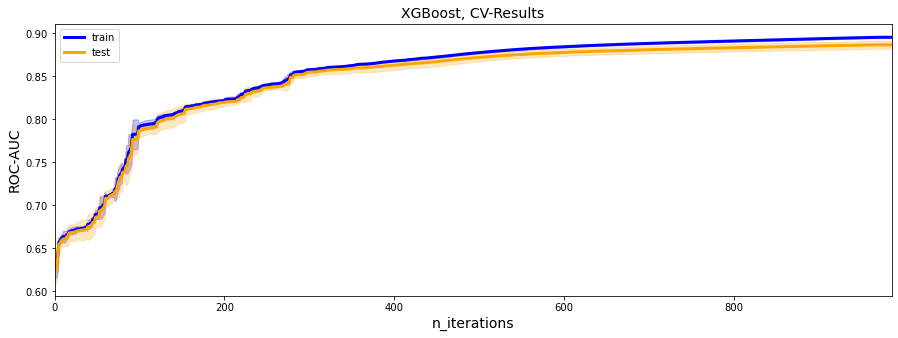

In [33]:
plotXgbResult(cv_xgb_num)

#### XGBoost - числовые и обработанные категориальные

In [34]:
%%time
model = train_xgb(params, prep_train, prep_valid, y_train, y_valid)

[11:44:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:230: Only 1 GPUs are visible, setting `gpu_id` to 0
[0]	train-auc:0.64819	valid-auc:0.65529
[250]	train-auc:0.84201	valid-auc:0.84863
[500]	train-auc:0.88347	valid-auc:0.88611
[750]	train-auc:0.89751	valid-auc:0.89773
[1000]	train-auc:0.90533	valid-auc:0.90318
[1248]	train-auc:0.90846	valid-auc:0.90531
Wall time: 35.9 s


In [35]:
%%time
# кросвалидация
cv_xgb_prep = cv_xgb(params, prep_train, y_train)

[11:45:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:230: Only 1 GPUs are visible, setting `gpu_id` to 0
[11:45:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:230: Only 1 GPUs are visible, setting `gpu_id` to 0
[11:45:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:230: Only 1 GPUs are visible, setting `gpu_id` to 0
[11:45:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:230: Only 1 GPUs are visible, setting `gpu_id` to 0
[11:45:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:230: Only 1 GPUs are visible, setting `gpu_id` to 0
Wall time: 2min 23s


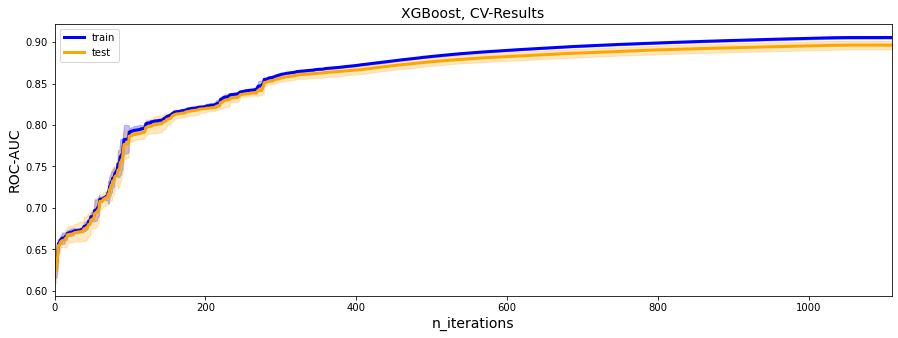

In [36]:
plotXgbResult(cv_xgb_prep)

### Вывод по XGBoost

Добавление предобработанных категорий повышает качество на 0,01 

## LightGBM


In [37]:
import lightgbm as lgb

In [38]:
def train_lgbm(params, x_train, x_valid, y_train, y_valid, cat_list='auto'):
    
    dtrain = lgb.Dataset(data=x_train, label=y_train)
    dvalid = lgb.Dataset(data=x_valid, label=y_valid)
    
    model = lgb.train(
        params=params,
        train_set=dtrain,
        num_boost_round=10000,
        early_stopping_rounds=50,
        valid_sets=[dtrain, dvalid],
        valid_names=["train", "valid"],
        verbose_eval=250,
        categorical_feature="auto",
    )
        
    return  model

In [39]:
def cv_lgbm(params, x_train, y_train, n_fold=5):
    dtrain = lgb.Dataset(data=x_train, label=y_train)
    cv_result = lgb.cv(
        params=params,
        train_set=dtrain,
        num_boost_round=10000,
        early_stopping_rounds=50,
        categorical_feature="auto",
        verbose_eval=250,
        stratified=True,
        metrics="auc",
        shuffle=True,
        nfold=n_fold,
        eval_train_metric=True
    )
    return cv_result

In [40]:
# ['train auc-mean', 'train auc-stdv', 'valid auc-mean', 'valid auc-stdv']
def plotLgbmResult(cv_result):
    res = pd.DataFrame.from_dict(cv_result)
    res.columns =['train-auc-mean', 'train-auc-std', 'test-auc-mean', 'test-auc-std']
    plotResult(res, 'LGBM')

In [41]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.01,
    'force_col_wise': True,
    "n_jobs": 6,
    "seed": 27
}

#### LGBM - числовые

In [42]:
%%time
# числовые данные
model = train_lgbm(params, num_train, num_valid, y_train, y_valid)

[LightGBM] [Info] Number of positive: 3856, number of negative: 131144
[LightGBM] [Info] Total Bins 31502
[LightGBM] [Info] Number of data points in the train set: 135000, number of used features: 376
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028563 -> initscore=-3.526666
[LightGBM] [Info] Start training from score -3.526666
Training until validation scores don't improve for 50 rounds
[250]	train's auc: 0.919784	valid's auc: 0.90989
[500]	train's auc: 0.944073	valid's auc: 0.923892
[750]	train's auc: 0.958927	valid's auc: 0.931948
[1000]	train's auc: 0.968498	valid's auc: 0.935959
[1250]	train's auc: 0.97535	valid's auc: 0.939246
[1500]	train's auc: 0.98008	valid's auc: 0.94146
[1750]	train's auc: 0.983133	valid's auc: 0.943078
[2000]	train's auc: 0.985748	valid's auc: 0.944398
[2250]	train's auc: 0.987976	valid's auc: 0.945346
[2500]	train's auc: 0.989686	valid's auc: 0.946687
[2750]	train's auc: 0.991408	valid's auc: 0.947639
[3000]	train's auc: 0.992604	valid's auc: 0.94858


In [43]:
%%time
# кросвалидация
cv_lgbm_num = cv_lgbm(params, num_train, y_train)

[LightGBM] [Info] Number of positive: 3085, number of negative: 104915
[LightGBM] [Info] Total Bins 31502
[LightGBM] [Info] Number of data points in the train set: 108000, number of used features: 376
[LightGBM] [Info] Number of positive: 3085, number of negative: 104915
[LightGBM] [Info] Total Bins 31502
[LightGBM] [Info] Number of data points in the train set: 108000, number of used features: 376
[LightGBM] [Info] Number of positive: 3085, number of negative: 104915
[LightGBM] [Info] Total Bins 31502
[LightGBM] [Info] Number of data points in the train set: 108000, number of used features: 376
[LightGBM] [Info] Number of positive: 3085, number of negative: 104915
[LightGBM] [Info] Total Bins 31502
[LightGBM] [Info] Number of data points in the train set: 108000, number of used features: 376
[LightGBM] [Info] Number of positive: 3084, number of negative: 104916
[LightGBM] [Info] Total Bins 31502
[LightGBM] [Info] Number of data points in the train set: 108000, number of used features:

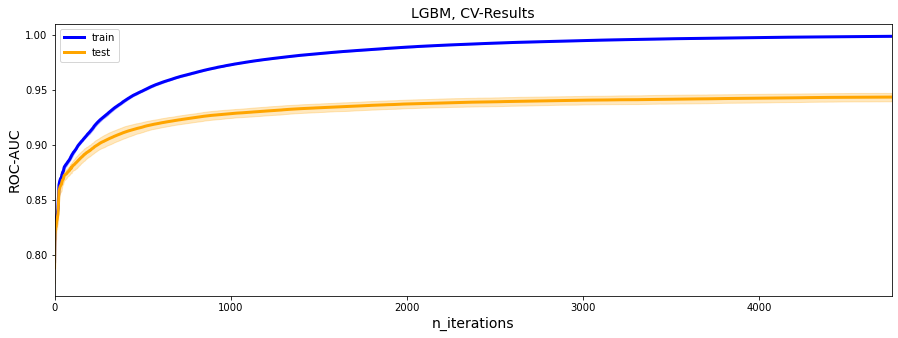

In [44]:
plotLgbmResult(cv_lgbm_num)

#### LGBM - числовые и обработанные категориальные

In [45]:
%%time
# num + cat подготовленнные
model = train_lgbm(params, prep_train, prep_valid, y_train, y_valid)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3856, number of negative: 131144
[LightGBM] [Info] Total Bins 31612
[LightGBM] [Info] Number of data points in the train set: 135000, number of used features: 427
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028563 -> initscore=-3.526666
[LightGBM] [Info] Start training from score -3.526666
Training until validation scores don't improve for 50 rounds
[250]	train's auc: 0.926076	valid's auc: 0.915467
[500]	train's auc: 0.953687	valid's auc: 0.931435
[750]	train's auc: 0.966088	valid's auc: 0.939394
[1000]	train's auc: 0.974936	valid's auc: 0.943624
[1250]	train's auc: 0.980555	valid's auc: 0.946428
[1500]	train's auc: 0.985039	valid's auc: 0.948929
[1750]	train's auc: 0.988615	valid's auc: 0.950649
[2000]	train's auc: 0.991141	valid's auc: 0.951843
[2250]	train's auc: 0.992877	valid's au

In [46]:
%%time
# кросвалидация
cv_lgbm_prep = cv_lgbm(params, prep_train, y_train)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3085, number of negative: 104915
[LightGBM] [Info] Total Bins 31612
[LightGBM] [Info] Number of data points in the train set: 108000, number of used features: 427
[LightGBM] [Info] Number of positive: 3085, number of negative: 104915
[LightGBM] [Info] Total Bins 31612
[LightGBM] [Info] Number of data points in the train set: 108000, number of used features: 427
[LightGBM] [Info] Number of positive: 3085, number of negative: 104915
[LightGBM] [Info] Total Bins 31612
[LightGBM] [Info] Number of data points in the train set: 108000, number of used features: 427
[LightGBM] [Info] Number of positive: 3085, number of negative: 104915
[LightGBM] [Info] Total Bins 31612
[LightGBM] [Info] Number of data points in the train set: 108000, number of used features: 427
[LightGBM] [Info] Number of positive: 3084, number of negative: 104916
[LightGBM] [Info] Total Bins 31612
[LightGBM]

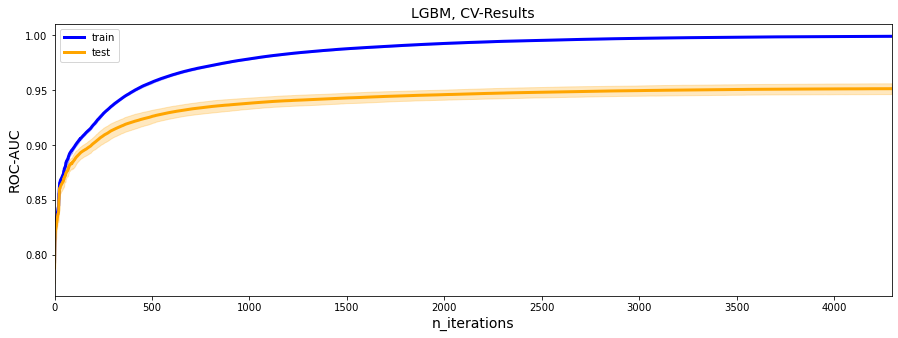

In [47]:
plotLgbmResult(cv_lgbm_prep)

#### LGBM данные с автоматической обработкой

In [48]:
def make_categoty_type(df):
    data = df.copy()
    for feature in CAT_F:
        print(feature, end=' ')
        data[feature] = pd.Series(data[feature], dtype="category")
    print()
    return data

In [49]:
lgbm_train = make_categoty_type(x_train)
lgbm_valid = make_categoty_type(x_valid)

ProductCD card4 card6 P_emaildomain R_emaildomain M1 M2 M3 M4 M5 M6 M7 M8 M9 
ProductCD card4 card6 P_emaildomain R_emaildomain M1 M2 M3 M4 M5 M6 M7 M8 M9 


In [50]:
%%time
# сырые данные с автоматической обработкой
model = train_lgbm(params, lgbm_train, lgbm_valid, y_train, y_valid, list(CAT_F))

[LightGBM] [Info] Number of positive: 3856, number of negative: 131144
[LightGBM] [Info] Total Bins 31666
[LightGBM] [Info] Number of data points in the train set: 135000, number of used features: 390


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028563 -> initscore=-3.526666
[LightGBM] [Info] Start training from score -3.526666
Training until validation scores don't improve for 50 rounds
[250]	train's auc: 0.927106	valid's auc: 0.917703
[500]	train's auc: 0.954525	valid's auc: 0.932758
[750]	train's auc: 0.96729	valid's auc: 0.940176
[1000]	train's auc: 0.975022	valid's auc: 0.943361
[1250]	train's auc: 0.980811	valid's auc: 0.945192
[1500]	train's auc: 0.985088	valid's auc: 0.946787
[1750]	train's auc: 0.988525	valid's auc: 0.948651
[2000]	train's auc: 0.990796	valid's auc: 0.950084
[2250]	train's auc: 0.992656	valid's auc: 0.951061
[2500]	train's auc: 0.994125	valid's auc: 0.952186
[2750]	train's auc: 0.995084	valid's auc: 0.952615
[3000]	train's auc: 0.995964	valid's auc: 0.953398
[3250]	train's auc: 0.996771	valid's auc: 0.954021
[3500]	train's auc: 0.997412	valid's auc: 0.954543
Early stopping, best iteration is:
[3642]	train's auc: 0.997758	valid's auc: 0.954835
Wall time

In [51]:
%%time
# кросвалидация
cv_lgbm_lgbm = cv_lgbm(params, lgbm_train, y_train)

[LightGBM] [Info] Number of positive: 3085, number of negative: 104915
[LightGBM] [Info] Total Bins 31666
[LightGBM] [Info] Number of data points in the train set: 108000, number of used features: 390
[LightGBM] [Info] Number of positive: 3085, number of negative: 104915
[LightGBM] [Info] Total Bins 31666
[LightGBM] [Info] Number of data points in the train set: 108000, number of used features: 390
[LightGBM] [Info] Number of positive: 3085, number of negative: 104915
[LightGBM] [Info] Total Bins 31666
[LightGBM] [Info] Number of data points in the train set: 108000, number of used features: 390
[LightGBM] [Info] Number of positive: 3085, number of negative: 104915
[LightGBM] [Info] Total Bins 31666
[LightGBM] [Info] Number of data points in the train set: 108000, number of used features: 390
[LightGBM] [Info] Number of positive: 3084, number of negative: 104916
[LightGBM] [Info] Total Bins 31666
[LightGBM] [Info] Number of data points in the train set: 108000, number of used features:

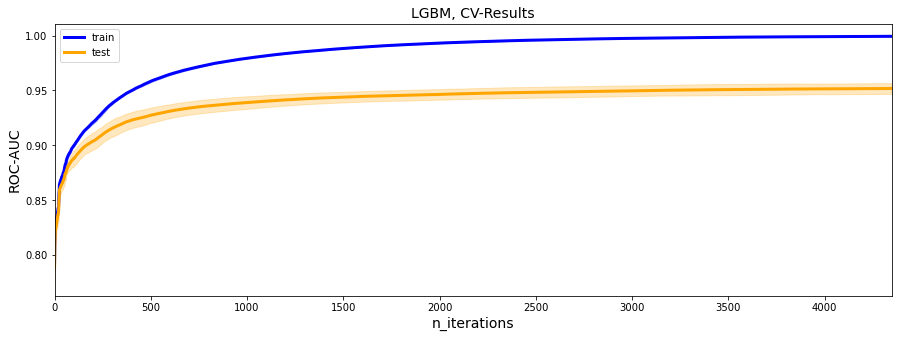

In [52]:
plotLgbmResult(cv_lgbm_lgbm)

## CatBoost

In [53]:
import catboost as cb

In [54]:
cat_f = list(CAT_F)

In [55]:
def train_catboost(params, x_train, x_valid, y_train, y_valid, cat_list=[]):
    
    model = cb.CatBoostClassifier(**cb_params)
    
    dtrain = cb.Pool(x_train, y_train, cat_features=cat_list)
    dvalid = cb.Pool(x_valid, y_valid, cat_features=cat_list)
    
    return model.fit(dtrain, eval_set=dvalid)

In [56]:
def cv_catboost(params, x_train, y_train, cat_list=[], n_fold=5):
    dtrain = cb.Pool(x_train, y_train, cat_features=cat_list)
    cv_result = cb.cv(
        params=params,
        dtrain=dtrain,
        num_boost_round=5000,
        early_stopping_rounds=50,
        shuffle=True,
        nfold=n_fold,
        stratified=True,
        verbose = 250,
#         metric_period=50,
    )
    return cv_result

In [57]:
def plotCatBoostResult(cv_result):
    res = cv_result[['train-AUC-mean','train-AUC-std','test-AUC-mean', 'test-AUC-std']]
    res.columns =['train-auc-mean', 'train-auc-std', 'test-auc-mean', 'test-auc-std']
    plotResult(res, 'CatBoost')

In [58]:
cb_params = {
    "n_estimators": 10000,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "custom_metric" : "AUC:hints=skip_train~false",
    "task_type": "GPU",
    "devices": '0:1',
    "max_bin": 64,
    "verbose": 250,
    "max_depth": 5,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 50,
    "thread_count": 6,
    "random_seed": 42
}

#### CatBoost - числовые

In [59]:
%%time
model = train_catboost(cb_params, num_train, num_valid, y_train, y_valid)

0:	learn: 0.6396321	test: 0.6428615	best: 0.6428615 (0)	total: 24.5ms	remaining: 4m 5s
250:	learn: 0.8759481	test: 0.8802985	best: 0.8802985 (250)	total: 3.56s	remaining: 2m 18s
500:	learn: 0.8849944	test: 0.8867285	best: 0.8867285 (500)	total: 6.72s	remaining: 2m 7s
750:	learn: 0.8903518	test: 0.8902357	best: 0.8902357 (750)	total: 9.96s	remaining: 2m 2s
1000:	learn: 0.8944178	test: 0.8926446	best: 0.8926501 (993)	total: 13.3s	remaining: 1m 59s
1250:	learn: 0.8971751	test: 0.8944103	best: 0.8944137 (1248)	total: 16.6s	remaining: 1m 55s
1500:	learn: 0.8994783	test: 0.8958140	best: 0.8958217 (1498)	total: 19.8s	remaining: 1m 52s
1750:	learn: 0.9018584	test: 0.8973898	best: 0.8973898 (1750)	total: 23.1s	remaining: 1m 48s
2000:	learn: 0.9039865	test: 0.8985629	best: 0.8985638 (1999)	total: 26.3s	remaining: 1m 45s
2250:	learn: 0.9061639	test: 0.8996240	best: 0.8996240 (2250)	total: 29.6s	remaining: 1m 41s
2500:	learn: 0.9082155	test: 0.9009426	best: 0.9009426 (2500)	total: 32.9s	remaining:

In [60]:
%%time
# кросвалидация
cv_cboost_num = cv_catboost(cb_params, num_train, y_train)

0:	learn: 0.6185203	test: 0.6166786	best: 0.6166786 (0)
250:	learn: 0.8751879	test: 0.8710997	best: 0.8710997 (250)
500:	learn: 0.8890260	test: 0.8830880	best: 0.8830880 (500)
750:	learn: 0.8961829	test: 0.8887696	best: 0.8887696 (750)
1000:	learn: 0.9010241	test: 0.8924921	best: 0.8924921 (1000)
1250:	learn: 0.9049715	test: 0.8955341	best: 0.8955341 (1250)
1500:	learn: 0.9079589	test: 0.8976735	best: 0.8976735 (1500)
1750:	learn: 0.9097996	test: 0.8990540	best: 0.8990566 (1748)
2000:	learn: 0.9117972	test: 0.9005080	best: 0.9005080 (2000)
2250:	learn: 0.9136599	test: 0.9017937	best: 0.9017937 (2250)
2500:	learn: 0.9152303	test: 0.9028524	best: 0.9028524 (2500)
2750:	learn: 0.9169240	test: 0.9039930	best: 0.9039930 (2750)
3000:	learn: 0.9186381	test: 0.9051251	best: 0.9051261 (2998)
3250:	learn: 0.9199843	test: 0.9059539	best: 0.9059539 (3250)
3500:	learn: 0.9212447	test: 0.9067488	best: 0.9067488 (3500)
3750:	learn: 0.9223471	test: 0.9075005	best: 0.9075012 (3748)
4000:	learn: 0.92340

In [61]:
cv_cboost_num.keys()

Index(['iterations', 'test-AUC-mean', 'test-AUC-std', 'train-AUC-mean',
       'train-AUC-std', 'test-Logloss-mean', 'test-Logloss-std',
       'train-Logloss-mean', 'train-Logloss-std'],
      dtype='object')

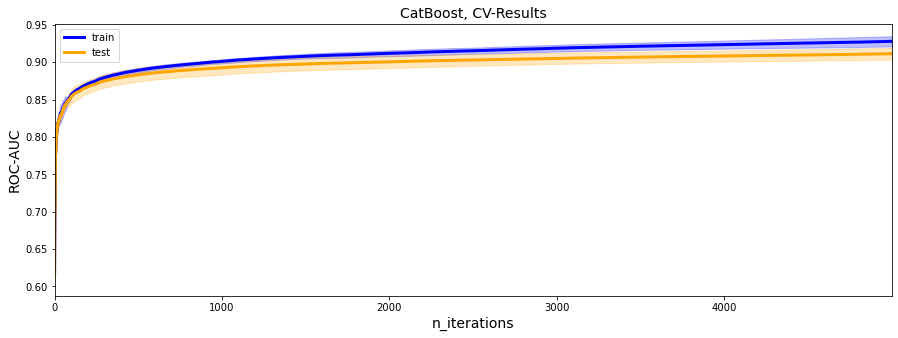

In [62]:
plotCatBoostResult(cv_cboost_num)

#### CatBoost - числовые и обработанные категориальные

In [63]:
%%time
model = train_catboost(cb_params, prep_train, prep_valid, y_train, y_valid)

0:	learn: 0.6396321	test: 0.6428615	best: 0.6428615 (0)	total: 13.9ms	remaining: 2m 18s
250:	learn: 0.8839085	test: 0.8883791	best: 0.8883791 (250)	total: 3.38s	remaining: 2m 11s
500:	learn: 0.8938178	test: 0.8951398	best: 0.8951398 (500)	total: 6.7s	remaining: 2m 7s
750:	learn: 0.8984011	test: 0.8979737	best: 0.8979737 (750)	total: 10s	remaining: 2m 3s
1000:	learn: 0.9018921	test: 0.8996308	best: 0.8996308 (1000)	total: 13.3s	remaining: 1m 59s
1250:	learn: 0.9046617	test: 0.9015023	best: 0.9015055 (1248)	total: 16.6s	remaining: 1m 56s
1500:	learn: 0.9070165	test: 0.9031133	best: 0.9031133 (1500)	total: 19.9s	remaining: 1m 52s
1750:	learn: 0.9096964	test: 0.9049492	best: 0.9049492 (1750)	total: 23.2s	remaining: 1m 49s
2000:	learn: 0.9119740	test: 0.9065761	best: 0.9065761 (2000)	total: 26.5s	remaining: 1m 46s
2250:	learn: 0.9138307	test: 0.9078136	best: 0.9078136 (2250)	total: 29.9s	remaining: 1m 42s
2500:	learn: 0.9159777	test: 0.9091076	best: 0.9091076 (2500)	total: 33.3s	remaining: 

In [64]:
%%time
# кросвалидация
cv_cboost_prep = cv_catboost(cb_params, prep_train, y_train)

0:	learn: 0.6185203	test: 0.6166786	best: 0.6166786 (0)
250:	learn: 0.8796725	test: 0.8749282	best: 0.8749282 (250)
500:	learn: 0.8956690	test: 0.8888738	best: 0.8888738 (500)
750:	learn: 0.9035070	test: 0.8954238	best: 0.8954238 (750)
1000:	learn: 0.9084595	test: 0.8994284	best: 0.8994284 (1000)
1250:	learn: 0.9125995	test: 0.9026601	best: 0.9026602 (1249)
1500:	learn: 0.9154040	test: 0.9049194	best: 0.9049194 (1500)
1750:	learn: 0.9177287	test: 0.9066697	best: 0.9066697 (1750)
2000:	learn: 0.9194414	test: 0.9079351	best: 0.9079351 (2000)
2250:	learn: 0.9213087	test: 0.9093012	best: 0.9093012 (2250)
2500:	learn: 0.9232170	test: 0.9107445	best: 0.9107445 (2500)
2750:	learn: 0.9247627	test: 0.9117910	best: 0.9117910 (2750)
3000:	learn: 0.9261757	test: 0.9127571	best: 0.9127571 (3000)
3250:	learn: 0.9276884	test: 0.9138090	best: 0.9138090 (3250)
3500:	learn: 0.9289788	test: 0.9148428	best: 0.9148428 (3500)
3750:	learn: 0.9301464	test: 0.9156921	best: 0.9156921 (3750)
4000:	learn: 0.93130

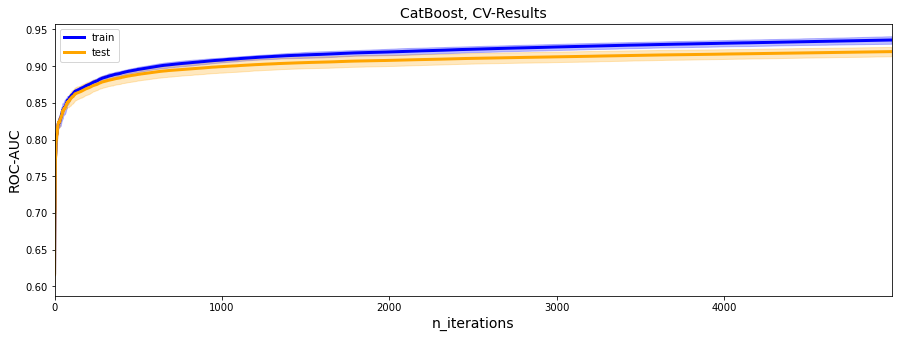

In [65]:
plotCatBoostResult(cv_cboost_prep)

#### CatBoost данные с автоматической обработкой

In [66]:
def make_categoty_str_type(df):
    data = df.copy()
    for feature in CAT_F:
        print(feature, end=' ')
        data[feature] = pd.Series(data[feature], dtype='str')
    print()
    return data

In [67]:
cb_train = make_categoty_str_type(x_train)
cb_valid = make_categoty_str_type(x_valid)

ProductCD card4 card6 P_emaildomain R_emaildomain M1 M2 M3 M4 M5 M6 M7 M8 M9 
ProductCD card4 card6 P_emaildomain R_emaildomain M1 M2 M3 M4 M5 M6 M7 M8 M9 


In [68]:
%%time
model = train_catboost(cb_params, cb_train, cb_valid, y_train, y_valid, cat_list=cat_f)

0:	learn: 0.6913539	test: 0.7025497	best: 0.7025497 (0)	total: 49.5ms	remaining: 8m 15s
250:	learn: 0.8500450	test: 0.8526713	best: 0.8526713 (250)	total: 12.4s	remaining: 8m 2s
500:	learn: 0.8751642	test: 0.8759902	best: 0.8759902 (500)	total: 24.5s	remaining: 7m 43s
750:	learn: 0.8841790	test: 0.8841228	best: 0.8841228 (750)	total: 36.3s	remaining: 7m 27s
1000:	learn: 0.8886780	test: 0.8879875	best: 0.8879890 (999)	total: 48.3s	remaining: 7m 14s
1250:	learn: 0.8912141	test: 0.8901049	best: 0.8901049 (1246)	total: 1m	remaining: 7m 1s
1500:	learn: 0.8940773	test: 0.8924067	best: 0.8924067 (1500)	total: 1m 12s	remaining: 6m 49s
1750:	learn: 0.8969192	test: 0.8945055	best: 0.8945055 (1750)	total: 1m 24s	remaining: 6m 37s
2000:	learn: 0.8987783	test: 0.8959454	best: 0.8959561 (1996)	total: 1m 36s	remaining: 6m 23s
2250:	learn: 0.9003812	test: 0.8972847	best: 0.8972847 (2250)	total: 1m 47s	remaining: 6m 11s
2500:	learn: 0.9017355	test: 0.8982639	best: 0.8982639 (2500)	total: 1m 59s	remaini

In [69]:
%%time
# кросвалидация
cv_cboost_cb = cv_catboost(cb_params,  cb_train, y_train, cat_list=cat_f)

0:	learn: 0.6712655	test: 0.6720383	best: 0.6720383 (0)
250:	learn: 0.8472553	test: 0.8480433	best: 0.8480433 (250)
500:	learn: 0.8589656	test: 0.8585400	best: 0.8585400 (500)
750:	learn: 0.8719152	test: 0.8707759	best: 0.8707769 (749)
1000:	learn: 0.8805993	test: 0.8783487	best: 0.8783487 (1000)
1250:	learn: 0.8857273	test: 0.8828383	best: 0.8828383 (1250)
1500:	learn: 0.8900229	test: 0.8864422	best: 0.8864422 (1500)
1750:	learn: 0.8932494	test: 0.8888958	best: 0.8888958 (1750)
2000:	learn: 0.8959619	test: 0.8910331	best: 0.8910331 (2000)
2250:	learn: 0.8984501	test: 0.8930743	best: 0.8930743 (2250)
2500:	learn: 0.9003673	test: 0.8946486	best: 0.8946487 (2499)
2750:	learn: 0.9020092	test: 0.8960784	best: 0.8960784 (2750)
3000:	learn: 0.9037503	test: 0.8975130	best: 0.8975130 (3000)
3250:	learn: 0.9050748	test: 0.8986359	best: 0.8986359 (3250)
3500:	learn: 0.9062124	test: 0.8995399	best: 0.8995399 (3500)
3750:	learn: 0.9072881	test: 0.9004296	best: 0.9004296 (3749)
4000:	learn: 0.90814

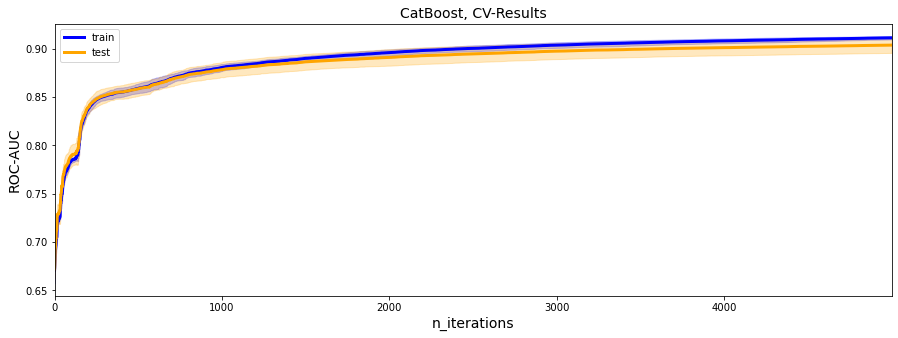

In [70]:
plotCatBoostResult(cv_cboost_cb)

## Графики и выводы

### Числовые данные

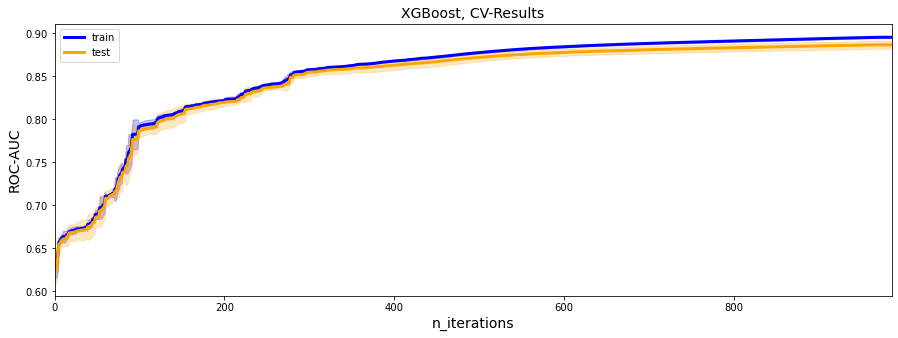

In [71]:
# XGBoost
plotXgbResult(cv_xgb_num)

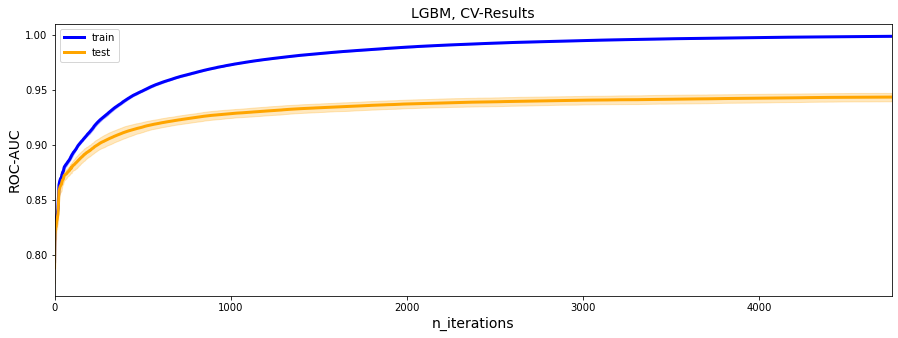

In [72]:
# LighGBM
plotLgbmResult(cv_lgbm_num)

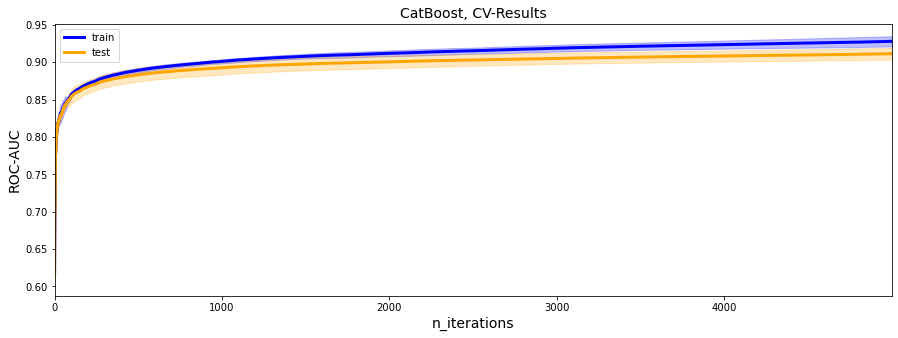

In [73]:
# CatBoost
plotCatBoostResult(cv_cboost_num)

#### Выводы для числовых данных

* Плавность обучения на LGBM и CatBoost, в отличии от XgBoost
* У LGBM большая разница между метрикой на Train и  Valid выборках
* CatBoost имеет больший разброс значений метрики на CV среди всех алгоритмов

### Предобработанные данные

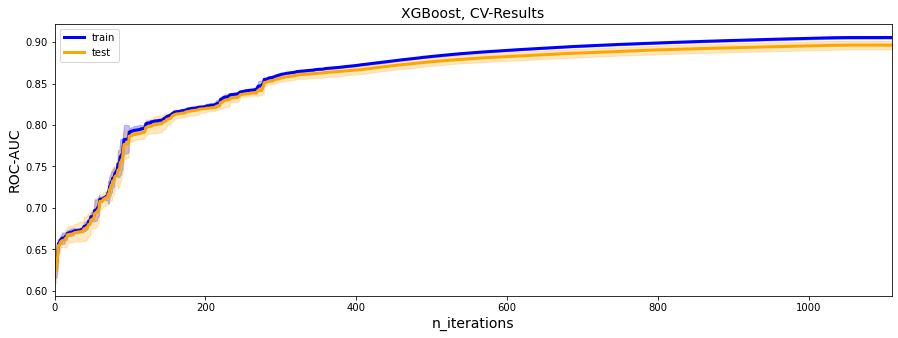

In [74]:
# XGBoost
plotXgbResult(cv_xgb_prep)

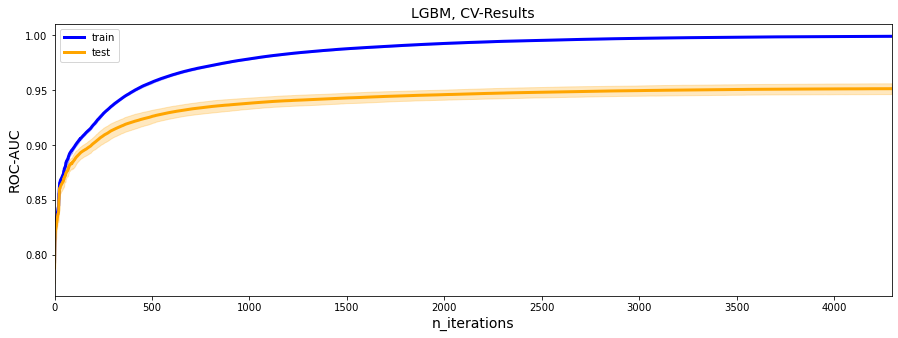

In [75]:
# LighGBM
plotLgbmResult(cv_lgbm_prep)

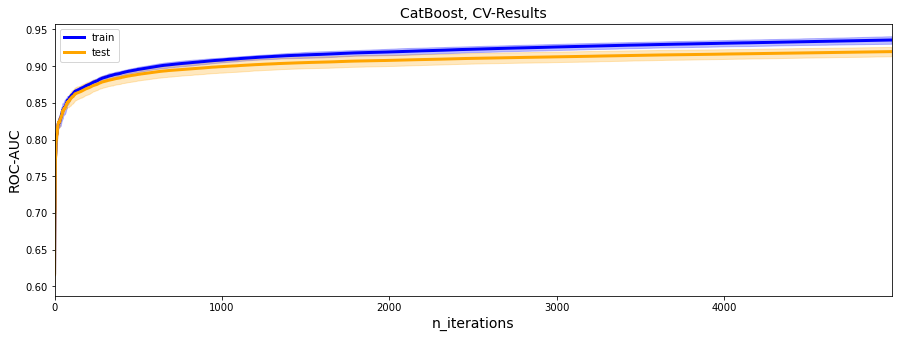

In [76]:
# CatBoost
plotCatBoostResult(cv_cboost_prep)

#### Выводы для предобработанных данных

* Плавность обучения на LGBM и CatBoost, в отличии от XgBoost
* У LGBM большая разница между метрикой на Train и  Valid выборках
* CatBoost имеет больший разброс значений метрики на CV среди всех алгоритмов

### Исходные данные

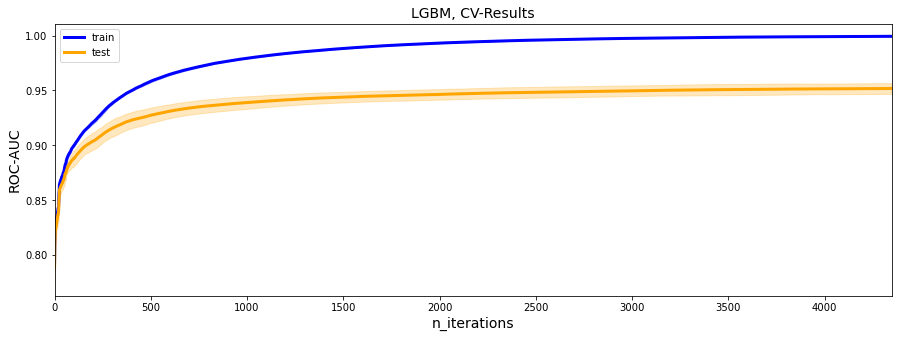

In [77]:
# LighGBM
plotLgbmResult(cv_lgbm_lgbm)

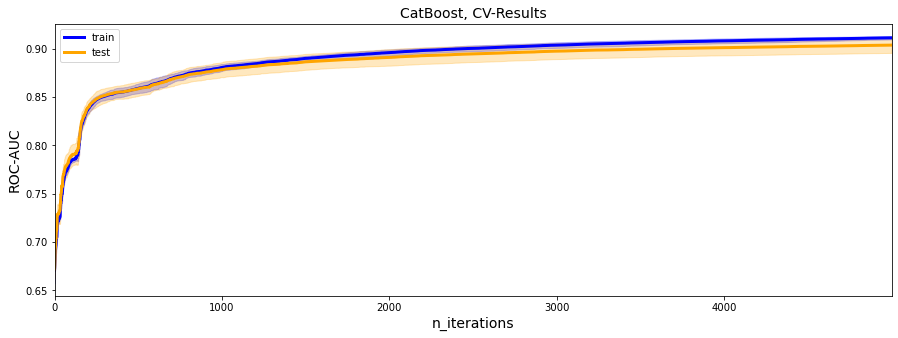

In [78]:
# CatBoost
plotCatBoostResult(cv_cboost_cb)

#### Выводы для числовых данных

* LGBM - сохранил свою плавность обучения и увеличил точность
* CatBoost - утратил плавность в начале обучения. Также увеличил точность по сравнению с числовыми данными